### Student Information
Name: Sarunyu Srisonthong

Student ID: 110062428

GitHub ID: SarunWu

Kaggle name: Daxiiez

Kaggle private scoreboard snapshot:

![score_board](./img/best.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

### Outline
- [Exercise 1 - Plot Word Frequency](#exercise-1)
    - [1.1. Load Data](#11-Load-Data)
    - [1.2 Step to build the vector](#12-step-to-build-the-counter-vector)
- [Exercise 2 - TF-IDF Features](#exercise-2)
- [Exercise 3 - Confusion Matrix Explanation](#exercise-3)
- [Exercise 4 - Build Naive Bayes Model](#exercise-4)
- [Exercise 5 - Naive Bayes and Decision Tree Comparison](#exercise-5)
- [Exercise 6 - Accuracy and Loss Ploting](#exercise-6)
- [Exercise 7 - Build neural network model based on embeddings input](#exercise-7)
- [Exercise 8 - T-SNE Visualization](#exercise-8)

#### Exercise 1

##### 1.1 Load Data

In [16]:
%matplotlib inline
import sklearn
sklearn.__version__

'1.1.1'

In [17]:
import pandas as pd

# training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [18]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [19]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                       sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [20]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [21]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


#### 1.2 Step to build the counter vector
1. declare vectorizer with maximum features number
2. fit target data into the declared vectorizer
3. count frequency
4. sort the word by frequency
5. do for both train and test data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import copy
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

#### Train data word frequency

[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'you'),
 Text(4, 0, 'of'),
 Text(5, 0, 'is'),
 Text(6, 0, 'it'),
 Text(7, 0, 'in'),
 Text(8, 0, 'that'),
 Text(9, 0, 'my'),
 Text(10, 0, 'for'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'this'),
 Text(15, 0, 'so'),
 Text(16, 0, 'have'),
 Text(17, 0, 'not'),
 Text(18, 0, 'just'),
 Text(19, 0, 'but'),
 Text(20, 0, 'with'),
 Text(21, 0, 'at'),
 Text(22, 0, 'can'),
 Text(23, 0, 'all'),
 Text(24, 0, 'like'),
 Text(25, 0, 'are'),
 Text(26, 0, 'your'),
 Text(27, 0, 'was'),
 Text(28, 0, 'when'),
 Text(29, 0, 'if')]

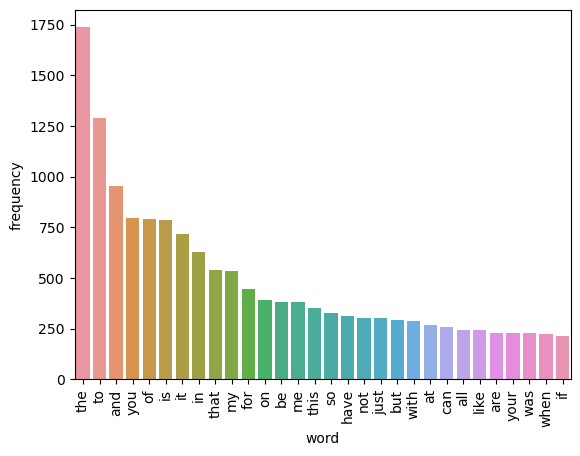

In [23]:
### train_data
count_train_vect = CountVectorizer(max_features=30)
X_train_counts = count_train_vect.fit_transform(train_df.text)
feature_train_names = count_train_vect.get_feature_names_out()

term_train_frequencies = np.asarray(X_train_counts.sum(axis=0))[0]
word_train_df = pd.DataFrame(copy.deepcopy(count_train_vect.get_feature_names_out()))
word_train_df.insert(len(word_train_df.columns), "frequency", pd.DataFrame(term_train_frequencies), True)
word_train_df = word_train_df.sort_values("frequency", ascending=False)
word_train_df = word_train_df.rename(columns={0: "word"})


g = sns.barplot(x=word_train_df.word,
                y=word_train_df.frequency)


g.set_xticklabels(word_train_df.word, rotation=90)

#### Test data word frequency

[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'it'),
 Text(4, 0, 'of'),
 Text(5, 0, 'you'),
 Text(6, 0, 'is'),
 Text(7, 0, 'in'),
 Text(8, 0, 'for'),
 Text(9, 0, 'that'),
 Text(10, 0, 'my'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'so'),
 Text(15, 0, 'was'),
 Text(16, 0, 'can'),
 Text(17, 0, 'all'),
 Text(18, 0, 'have'),
 Text(19, 0, 'at'),
 Text(20, 0, 'just'),
 Text(21, 0, 'with'),
 Text(22, 0, 'are'),
 Text(23, 0, 'get'),
 Text(24, 0, 'but'),
 Text(25, 0, 'not'),
 Text(26, 0, 'like'),
 Text(27, 0, 'this'),
 Text(28, 0, 'up'),
 Text(29, 0, 'your')]

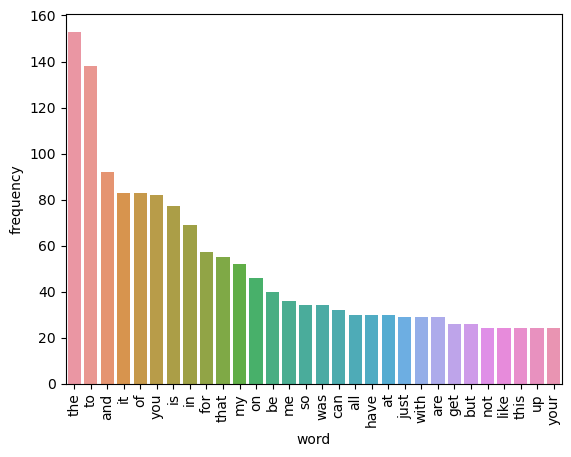

In [24]:
### test_data
count_test_vect = CountVectorizer(max_features=30)
X_test_counts = count_test_vect.fit_transform(test_df.text)
feature_test_names = count_test_vect.get_feature_names_out()

term_test_frequencies = np.asarray(X_test_counts.sum(axis=0))[0]
word_test_df = pd.DataFrame(copy.deepcopy(count_test_vect.get_feature_names_out()))
word_test_df.insert(len(word_test_df.columns), "frequency", pd.DataFrame(term_test_frequencies), True)
word_test_df = word_test_df.sort_values("frequency", ascending=False)
word_test_df = word_test_df.rename(columns={0: "word"})

g = sns.barplot(x=word_test_df.word,
                y=word_test_df.frequency)


g.set_xticklabels(word_test_df.word, rotation=90)

----

#### Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].
- [x] Fit the data to tfidf_vectorizer by setting max features to 1000
- [x] Show the feature names for features from 100 to 110

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf_train = tfidf_vectorizer.fit_transform(train_df['text'])
X_tfidf_test = tfidf_vectorizer.transform(test_df['text'])

print("Train shape:", X_tfidf_train.shape)
print("Test shape:", X_tfidf_test.shape)
print("Feature names from 100 to 110: ", tfidf_vectorizer.get_feature_names_out()[100:110])

Train shape: (3613, 1000)
Test shape: (347, 1000)
Feature names from 100 to 110:  ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


----

#### Exercise 3
Confusion matrix explanation


In [26]:
from sklearn.tree import DecisionTreeClassifier

# for a classification problem, you need to provide both training & testing data
X_train = tfidf_vectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = tfidf_vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [27]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
print(y_test_pred[:10])

['joy' 'anger' 'joy' 'fear' 'joy' 'sadness' 'fear' 'anger' 'joy' 'fear']


In [28]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.75


In [29]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.70      0.82      0.76        84
        fear       0.73      0.75      0.74       110
         joy       0.84      0.81      0.83        79
     sadness       0.75      0.61      0.67        74

    accuracy                           0.75       347
   macro avg       0.76      0.75      0.75       347
weighted avg       0.75      0.75      0.75       347



In [30]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[69 10  2  3]
 [13 83  6  8]
 [ 5  6 64  4]
 [11 14  4 45]]


In [31]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           xlabel='True label',
           ylabel='Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

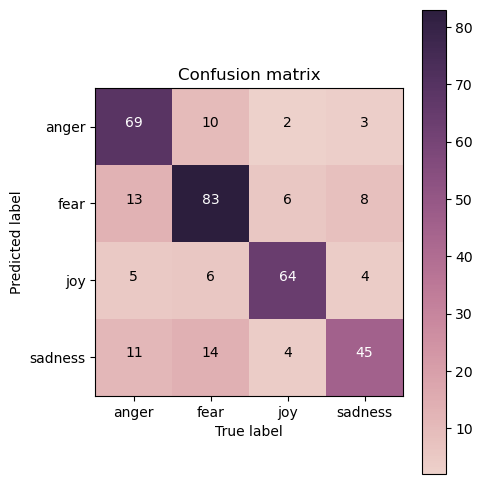

In [32]:
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Confusion matrix explanation

#### Answer
1. The model is trained
2. The test dataset is used to predict the expected class then we got the actual result.
3. We need to know how many actual results are correctly predicted.
4. Then confusion matrix function is used to calculate the number of the actual results that are correctly predicted as expected result.

From the confusion matrix above it demonstrates number between predicted result (Predicted label) and expected result (True label).
Both X and Y axis show the labels of the classes.

The cells from diagonal axis from top left to bottom right indicates the correct prediction, which we expect it to have higher number. For the above and below cells are the wrong results that model predicted as other labels.
For example the first row and first column indicates that models predicted test data as "anger" label correctly 69 times. But for latter columns (2nd - `fear`, 3rd - `joy`, 4th - `sadness`) were wrongly predicted 10, 2, and 3 times respectively.

The higher number the lighter colour of the cell, the lower number the darker colour of the cell. Anyway it depends on how we set the colour for the matrix (it can be opposite).


----
#### Exercise 4

Build, train, and test a model using a Naive Bayes model.

training accuracy: 0.87
testing accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347

[[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


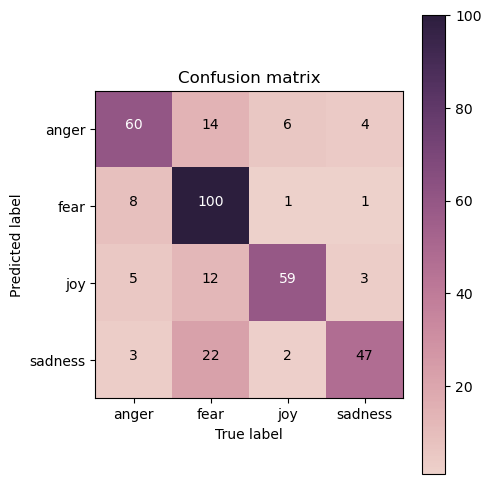

In [33]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

## predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

## Calculate accuracy score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

## Generate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Test Result
The ratio of accuracy between test and train results is 0.87/0.77 = 1.13.
it means the model accuracy different from the training and test around 13 percent.

The interesting information is the fear emotion because the highest confusion is from this class (from its lowest precision score).
It often be predicted as sad, anger, and joy respectively.

On the other hand, the model best recognize joy emotion from its higest precision score 0.87.


----
#### Exercise 5

### Naive Bayes and Decision Trees Comparison

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer

#### Decision tree
Decision tree is build by calculating information gain and getting question to be decided from each record of training data.

Information gain is calculated by impurity value which indicates the chance of being incorrect when selecting data.

The best information gain will give the best question to be a decision node.

The tree will try to build the nodes that base fit the training data. However, it may memorize the noise of the training data and fails to capture important patterns. A perfectly fit decision tree performs well for training data but performs poorly for unseen test data.

As we can see from comparison of accuracy during training and testing. Training got 0.99 accuracy but when testing it got just 0.75, this means the model is overfitting.

And overall scores like precision, recall, and f1-score are all lower than the counterpart model multinomial naivebayes.

#### Naive Bayes
Naive Bayes model is build from the model that learns the features from each term in the document. Each learning iteration the model, for each class, calculates posterior probability based on the previous probability and the likelihood that the class could occure in the document.

Because the model learns all the changes during training process statistically which considers all the features for each class dependently. Although the model doesn't get decent accuracy during training process, testing process, which used unseen data, can predict more accurately.

From the overall scores naivebayes outperforms the decision tree model. Which also means naivebayes is more genelarized than the decision tree model.

----

### Exercise 6
#### Accuracy and loss plotting

In [34]:
import nltk

# build analyzers (bag-of-words)
# we want to use this tokenizer because it contains more meaningful word vector, like emoji character
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/kneskung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [35]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3227    sadness
114       anger
1151       fear
488       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [37]:
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)


def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [38]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)



## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [39]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [40]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape,))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                  

2022-11-25 18:06:17.137553: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-25 18:06:17.137862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [42]:
import tensorflow as tf
from keras.callbacks import CSVLogger



csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data=(X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 3s 28ms/step - loss: 0.9648 - accuracy: 0.6673 - val_loss: 0.9008 - val_accuracy: 0.6571
Epoch 2/25
113/113 [==============================] - 3s 23ms/step - loss: 0.5742 - accuracy: 0.8029 - val_loss: 0.7885 - val_accuracy: 0.6916
Epoch 3/25
113/113 [==============================] - 3s 27ms/step - loss: 0.4091 - accuracy: 0.8516 - val_loss: 0.8129 - val_accuracy: 0.7061
Epoch 4/25
113/113 [==============================] - 3s 25ms/step - loss: 0.3212 - accuracy: 0.8851 - val_loss: 0.8159 - val_accuracy: 0.6945
Epoch 5/25
113/113 [==============================] - 3s 27ms/step - loss: 0.2610 - accuracy: 0.9081 - val_loss: 0.8752 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 3s 25ms/step - loss: 0.2215 - accuracy: 0.9258 - val_loss: 0.9416 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 3s 28ms/step - loss: 0.1821 - accuracy: 0.9446 - val_loss: 0.9865 - val_accuracy: 0.6945

In [43]:
## predict
pred_result = model.predict(X_test, batch_size=128)
print(pred_result[:5])

3/3 [==============================] - 0s 39ms/step
[[3.76084000e-02 4.22956422e-02 8.09228480e-01 1.10867567e-01]
 [9.99868393e-01 1.45595777e-05 1.47851711e-06 1.15572446e-04]
 [2.22021517e-05 6.36603800e-05 9.99570906e-01 3.43220017e-04]
 [6.88338901e-07 9.99797404e-01 3.26212977e-08 2.01896415e-04]
 [7.29647880e-08 1.00646948e-05 9.99965072e-01 2.46988802e-05]]


2022-11-25 18:08:31.435011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [44]:
pred_result = label_decode(label_encoder, pred_result)
print(pred_result[:5])

['joy' 'anger' 'joy' 'fear' 'joy']


In [45]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [46]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.667313,0.964773,0.657061,0.900826
1,1,0.802934,0.574243,0.691643,0.788457
2,2,0.851647,0.409054,0.706052,0.812859
3,3,0.885137,0.321231,0.694525,0.815879
4,4,0.908110,0.260952,0.688761,0.875214
5,5,0.925823,0.221532,0.671470,0.941551
6,6,0.944644,0.182139,0.694525,0.986496
7,7,0.953224,0.153908,0.688761,1.062674
8,8,0.957099,0.139025,0.697406,1.096074
9,9,0.962912,0.128203,0.688761,1.134491


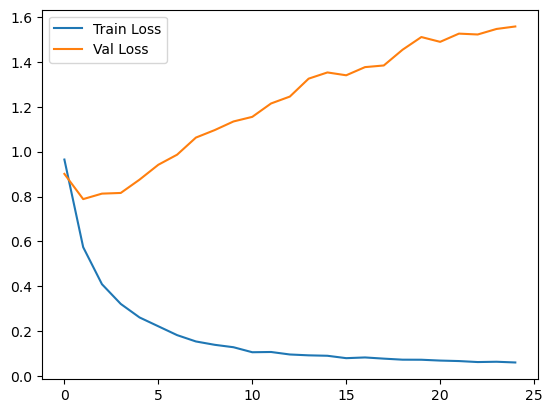

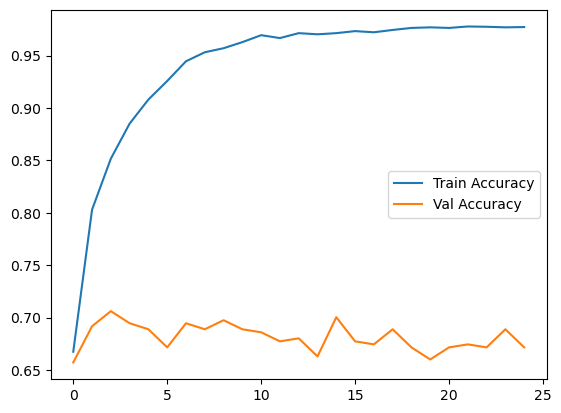

In [47]:
# Answer here
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

### Loss function graph interpretation

Because we cannot only rely on the final result of accuracy rate, but we need to justify if the model does truthful prediction.

So we use test dataset to calculate loss and accuracy values in order to justify the reliability of the trained model.
The decent model, the trend of train and test both accuracy and loss values should converge to each other.
For the loss value, the closer to the zero the better. On the other hand, the accuracy value should close to the 1.

According to the graph, it is showing that the validation loss trend increasing while train loss decreasing it indicates that the trained dataset is over-fitting.
It means that the model relies on the training data too much thus fails to generalize the data from the validation data.



#### But what is the loss function actually?
It is a method of evaluating how well the algorithm models and shapes training dataset. The loss value is calculated from cross entropy loss function and thus compare with the predicted probability.
Each training epoch will calculate summation of loss values that will be used to update weights and biases via back propagation.
If the model cannot decrease the loss value there are two main problems in there.
- First, the training data is imbalant. There might be some classes have bigger proportions than the other. Hence, we should alleviate the problem by under_sampling or over_sampling.
- Second, hyperparameter such as learning rate and batch_size are not fit well with the model. Thus, need to tune and fine the better learning rate and batch_size. Sometimes, we might also need to change optimizer and activation function that best match to each other.




----

### Exercise 7
#### Build neural network model based on embeddings input
1. In this exercise, the `glove_twitter_200` word to vector model is used which has 200 dimension of word features.
2. In the fact that the training data is imbalant, so I tried to apply over sampling strategy to train model.
3. The word embeddings is built to be an input in neural network model.

In [48]:
## check library
import nltk
import gensim

## ignore warnings
import warnings

warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3227,40400,"Don't blame yourself,' he spoke, as if she wer...","[Do, n't, blame, yourself, ,, ', he, spoke, ,,..."
114,10114,@VerizonSupport thanks for saying My wife and ...,"[@, VerizonSupport, thanks, for, saying, My, w..."
1151,20294,@williamcontrol just preordered The Pale EP......,"[@, williamcontrol, just, preordered, The, Pal..."
488,10488,Before revenge you feel good after revenge you...,"[Before, revenge, you, feel, good, after, reve..."
1532,20675,"We, #Indians, can hold our heads up high and s...","[We, ,, #, Indians, ,, can, hold, our, heads, ..."


In [49]:
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [50]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_200_model = api.load("glove-twitter-200")
print('load ok')

glove_twitter_200_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.8998554944992065),
 ('day', 0.8070886731147766),
 ('bday', 0.7734537720680237),
 ('wish', 0.7571845650672913),
 ('merry', 0.726503849029541),
 ('love', 0.7250142693519592),
 ('year', 0.7109401226043701),
 ('you', 0.7065563797950745),
 ('hope', 0.7004973292350769),
 ('thank', 0.6997925043106079)]

#### Oversampling
Becouse the proportion of joy emotion is higher that the other, I tried to use over sampling approach to train the model.

<BarContainer object of 4 artists>

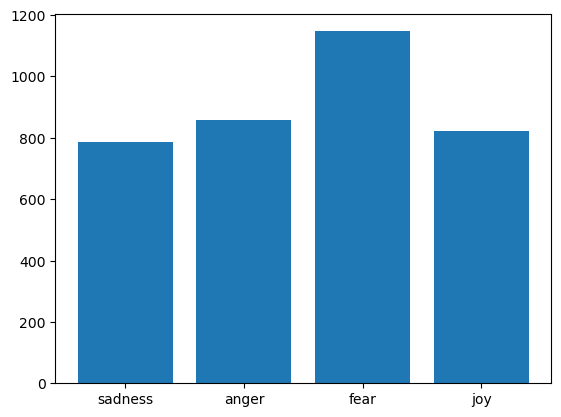

In [51]:
from collections import Counter

cnt = Counter(train_df['emotion'])
plt.bar(cnt.keys(), cnt.values())

In [52]:

from imblearn.over_sampling import RandomOverSampler

text_data = train_df['text'].to_numpy().reshape(-1, 1)
label_data = train_df['emotion'].to_numpy().reshape(-1, 1)

ros = RandomOverSampler(random_state=0)
# rus.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(text_data, label_data)
resampled_train_df = pd.DataFrame({'text': [r[0] for r in X_resampled.tolist()], 'emotion': y_resampled.tolist()})
resampled_train_df

,text,emotion
0,"Don't blame yourself,' he spoke, as if she wer...",sadness
1,@VerizonSupport thanks for saying My wife and ...,anger
2,@williamcontrol just preordered The Pale EP......,fear
3,Before revenge you feel good after revenge you...,anger
4,"We, #Indians, can hold our heads up high and s...",fear
...,...,...
4583,Dad asked if I was too hungover to function to...,sadness
4584,im so gloomy today,sadness
4585,@jaymohr37 droop saw naked wrestling and asked...,sadness
4586,Feel so grim + ugly atm,sadness


<BarContainer object of 4 artists>

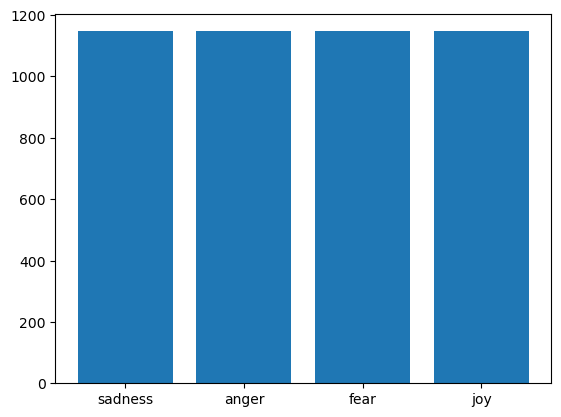

In [53]:
resampled_cnt = Counter(resampled_train_df['emotion'])
plt.bar(resampled_cnt.keys(), resampled_cnt.values())

As we can see from above bar graph the proportion of all emotions now are the same.

### Prepare training data for word embedding
1. Get vocab size from the text in train and test dataset
2. Create tokenizer for the dataset word corpus.
3. Encode the word into its index in the corpus.
4. Padding the encoding tokens to the max length.
5. Transform the text labels into categorical labels.
6. Create word embeddings metrix for the embedding layer of neural networks.

In [54]:
from keras.preprocessing.text import Tokenizer
import numpy as np

# 1. Get vocab_size
# 2. Create tokenizer
phrases = pd.concat([resampled_train_df, test_df], ignore_index=True)['text']
tok = Tokenizer()
tok.fit_on_texts(phrases)
vocab_size = len(tok.word_index) + 1

In [55]:
# 3. Encode to the word into its index
train_encoded_phrase = tok.texts_to_sequences(resampled_train_df['text'])
test_encoded_phrase = tok.texts_to_sequences(test_df['text'])
lengths = [len(i) for i in train_encoded_phrase]
max(lengths)

34

In [56]:
from keras.utils import pad_sequences

# 4. Padding encoding sequences.
X_train = pad_sequences(train_encoded_phrase, maxlen=max(lengths), padding='post')
X_test = pad_sequences(test_encoded_phrase, maxlen=max(lengths), padding='post')

In [57]:
from sklearn.preprocessing import OneHotEncoder

# Get categorical labels from one hot encoder
encoder = OneHotEncoder()
x_trans = encoder.fit_transform(y_resampled.reshape(-1,1))
labels_dict = {i: label[3:] for i, label in enumerate(encoder.get_feature_names_out())}
labels_dict

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'}

In [58]:
from sklearn import preprocessing

# 5. Transform the text labels into categorical labels

mlb = preprocessing.LabelBinarizer()

mlb.fit(resampled_train_df['emotion'])
y_train = mlb.transform(resampled_train_df['emotion']).tolist()
y_train = [list(map(float, label)) for label in y_train]
y_train = np.array(y_train)

mlb.fit(test_df['emotion'])
y_test = mlb.transform(test_df['emotion']).tolist()
y_test = [list(map(float, label)) for label in y_test]
y_test = np.array(y_test)
print(y_train[:5])
print(y_test[:5])

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [59]:
# 6. Create word embeddings metrix
gl_tw_200_EMBEDDING_DIM = glove_twitter_200_model.vector_size
gl_tw_200_embedding_matrix = np.zeros((vocab_size, gl_tw_200_EMBEDDING_DIM))
for word, i in tok.word_index.items():
    embedding_vector = glove_twitter_200_model[i]
    if embedding_vector is not None:
        gl_tw_200_embedding_matrix[i] = embedding_vector
gl_tw_200_embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.51319999e-01,  5.60840010e-04, -2.14880005e-01, ...,
         3.66839990e-02, -3.72060016e-02,  8.53839993e-01],
       [ 8.07669997e-01,  4.97860014e-01,  8.26959983e-02, ...,
        -7.33020008e-02, -4.77849990e-01,  6.70589983e-01],
       ...,
       [-5.00129998e-01, -2.00700000e-01, -7.92289972e-01, ...,
        -3.78219992e-01, -1.60530001e-01, -5.02719998e-01],
       [ 1.65639997e-01, -2.62850001e-02,  4.78709996e-01, ...,
        -1.90579996e-01,  1.69090003e-01, -2.64959991e-01],
       [ 4.79299992e-01,  3.94309983e-02, -3.66769999e-01, ...,
        -4.97170001e-01, -5.13169989e-02,  3.98630016e-02]])

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Activation
from keras.initializers.initializers_v2 import Constant
from keras.optimizers import Adam

model = Sequential()
model.add(
    Embedding(input_dim=vocab_size, output_dim=gl_tw_200_EMBEDDING_DIM, input_length=34, trainable=False,
              embeddings_initializer=Constant(gl_tw_200_embedding_matrix)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Flatten())
model.add(Dense(output_shape))
model.add(Activation('softmax'))
model.compile(optimizer=Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['Accuracy'])

In [61]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 200)           2312000   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 2,380,100
Trainable params: 68,100
Non-trainable params: 2,312,000
_________________________________________________________________
None


In [62]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

Epoch 1/25


2022-11-25 18:09:46.258029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-25 18:09:46.488108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-25 18:09:46.744330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - ETA: 0s - loss: 1.3859 - Accuracy: 0.2663

2022-11-25 18:09:50.838413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-25 18:09:50.915606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 6s 31ms/step - loss: 1.3859 - Accuracy: 0.2663 - val_loss: 1.4120 - val_Accuracy: 0.2248
Epoch 2/25
144/144 [==============================] - 3s 24ms/step - loss: 1.3841 - Accuracy: 0.2779 - val_loss: 1.3864 - val_Accuracy: 0.2565
Epoch 3/25
144/144 [==============================] - 3s 22ms/step - loss: 1.3186 - Accuracy: 0.3339 - val_loss: 1.3401 - val_Accuracy: 0.3170
Epoch 4/25
144/144 [==============================] - 3s 22ms/step - loss: 1.1642 - Accuracy: 0.4745 - val_loss: 1.3271 - val_Accuracy: 0.3804
Epoch 5/25
144/144 [==============================] - 3s 22ms/step - loss: 0.9583 - Accuracy: 0.6077 - val_loss: 1.3296 - val_Accuracy: 0.4207
Epoch 6/25
144/144 [==============================] - 3s 23ms/step - loss: 0.7907 - Accuracy: 0.6968 - val_loss: 1.4447 - val_Accuracy: 0.4121
Epoch 7/25
144/144 [==============================] - 3s 22ms/step - loss: 0.6476 - Accuracy: 0.7655 - val_loss: 1.4883 - val_Accuracy: 0.4524
Epoch 8/25

In [63]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

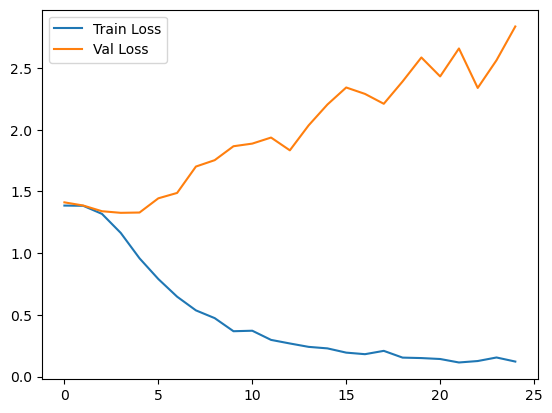

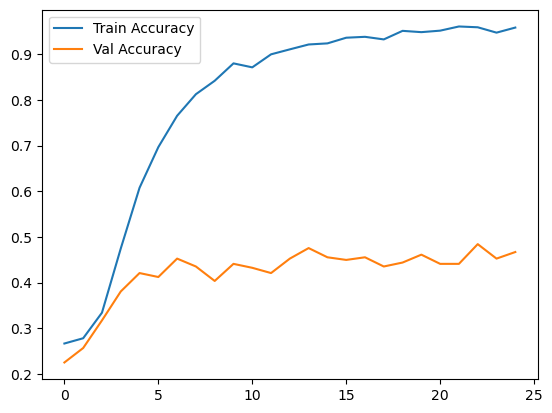

In [64]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

### Result
From this experiment, the result of this model isn't decent. The loss and accuracy scores are decreasing.

The training data might need to be preprocessed before training like removing duplicated values, special characters, emojis,
or even more advanced detect sacarsm features, which are the main bias for emotion recognition.

Or the neural network might be apply bidirectional neural networks to make model understand more context from the end of the data.

----

#### Exercise 8
T-SNE Visualization of the 15 words most related to the words "angry", "happy", "sad", "fear"

In [65]:
# Answer here
_angry = "angry"
_happy = "happy"
_sad = "sad"
_fear = "fear"

_topn = 15
_angry_words = [_angry] + [word_ for word_, sim_ in glove_twitter_200_model.most_similar(_angry, topn=_topn)]
_happy_words = [_happy] + [word_ for word_, sim_ in glove_twitter_200_model.most_similar(_happy, topn=_topn)]
_sad_words = [_sad] + [word_ for word_, sim_ in glove_twitter_200_model.most_similar(_sad, topn=_topn)]
_fear_words = [_fear] + [word_ for word_, sim_ in glove_twitter_200_model.most_similar(_fear, topn=_topn)]

print('angry_words: ', _angry_words)
print('happy_words: ', _happy_words)
print('sad_words: ', _sad_words)
print('fear_words: ', _fear_words)

_target_words = _angry_words + _happy_words + _sad_words + _fear_words
print('\ntarget words: ')
print(_target_words)

print('\ncolor list:')
_cn = _topn + 1
_color = ['b'] * _cn + ['g'] * _cn + ['r'] * _cn + ['y'] * _cn
print(_color)

angry_words:  ['angry', 'birds', 'mad', 'annoyed', 'upset', 'frustrated', 'pissed', 'confused', 'stupid', 'bird', 'sometimes', 'annoying', 'cry', 'when', 'sad', 'because']
happy_words:  ['happy', 'birthday', 'day', 'bday', 'wish', 'merry', 'love', 'year', 'you', 'hope', 'thank', 'enjoy', 'good', 'thanks', 'christmas', 'too']
sad_words:  ['sad', 'depressing', 'really', 'depressed', 'sick', 'feel', 'cry', 'upset', 'bad', 'but', 'disappointed', 'kinda', 'how', 'tired', 'seriously', 'mad']
fear_words:  ['fear', 'afraid', 'fears', 'faith', 'doubt', 'scared', 'without', 'death', 'failure', 'knowing', 'never', 'reason', 'n’t', 'pain', 'lack', 'cannot']

target words: 
['angry', 'birds', 'mad', 'annoyed', 'upset', 'frustrated', 'pissed', 'confused', 'stupid', 'bird', 'sometimes', 'annoying', 'cry', 'when', 'sad', 'because', 'happy', 'birthday', 'day', 'bday', 'wish', 'merry', 'love', 'year', 'you', 'hope', 'thank', 'enjoy', 'good', 'thanks', 'christmas', 'too', 'sad', 'depressing', 'really', '

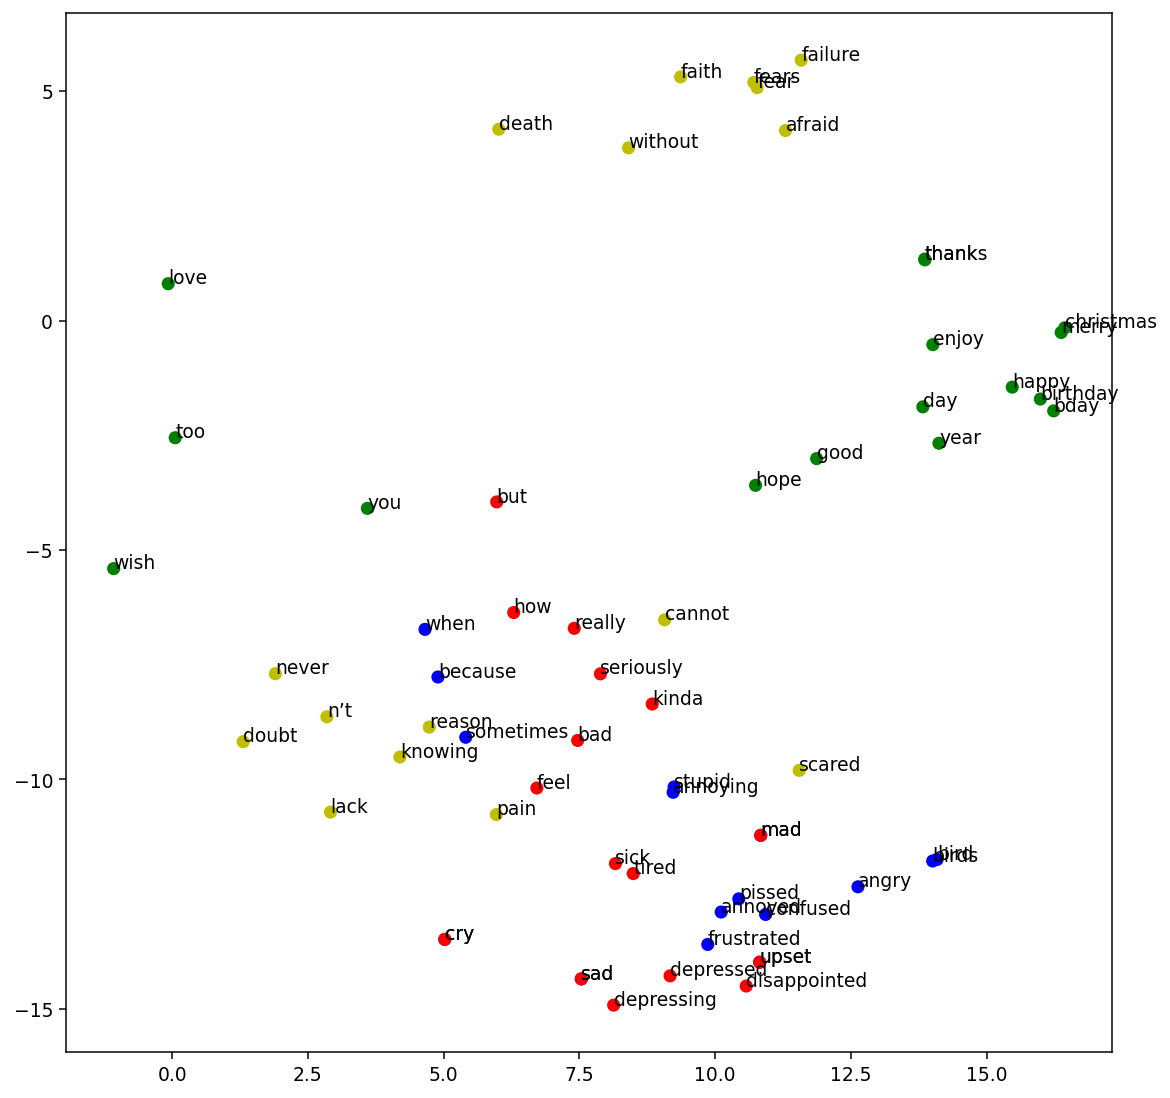

In [66]:
from sklearn.manifold import TSNE

## prepare training word vectors
_model = glove_twitter_200_model

_size = 200
_target_size = len(_target_words)
_all_word = list(_model.index_to_key)
_word_train = _target_words + _all_word[:_size]
_X_train = _model[_word_train]

## t-SNE model
_tsne = TSNE(n_components=2, metric='cosine', random_state=28, n_iter = 1000)

## training
_X_tsne = _tsne.fit_transform(_X_train)

## plot the result
plt.figure(figsize=(10, 10), dpi=135)
plt.scatter(_X_tsne[:_target_size, 0], _X_tsne[:_target_size, 1], c=_color)
for label, x, y in zip(_target_words, _X_tsne[:_target_size, 0], _X_tsne[:_target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

#### T-SNE (t-distributed Stochastic Neighbor Embedding)
T-SNE is a algorithm for visualizing the data that is captured in the sense that neighboring points in the input space will tend to be neighbors in the low dimensional space.
Unlike PCA, t-SNE doesn't care how far the data points are. For some setting or data model might not provide a good visualization. As we can see from the plot above, `glove_twitter_200_model` doesn't provide a good cluttering result. Some clusters are mixing up with other clusters.

----